# PROJECT 02: PHÂN TÍCH DỮ LIỆU
- Lê Minh Hữu - 19120525
- Ninh Duy Huy - 19120533
- Cao Thanh Khiết - 19120544
- Nguyễn Tuấn Khoa - 19120547
- Trần Tuấn Kiệt - 19120557


## TIỀN XỬ LÝ DỮ LIỆU

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
playlists_df = pd.read_csv("data/playlists.csv", sep=",")
tracks_df = pd.read_csv("data/tracks.csv", sep=",")
users_df = pd.read_csv("data/users.csv", sep=",")

# configure matplotlib
plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
### Thông tin về số dòng và cột của dữ liệu ban đầu
print(playlists_df.shape)
print(tracks_df.shape)
print(users_df.shape)

(608, 3)
(6979, 45)
(422, 33)


In [4]:
# delete some row with missing values more than the given ratio
def preprocess_data(old_df, ratio):
    '''
    Hàm này sẽ tiền xử lí dữ liệu, loại bỏ một vài dòng hoặc cột khi mất mát dữ liệu quá tỉ lệ cho trước
    '''
    attributes = list(old_df.columns)
    row = len(old_df.index)
    col = len(attributes)

    a = []
    arr=[]
    for i in range(row):
        for j in range(col):
            a.append(old_df[attributes[j]][i])
        arr.append(a)
        a = []

    result_arr = []
    temp_a = []
    for i in range(row):
        for j in range(col):
            temp_a.append(arr[i][j])
        result_arr.append(temp_a)
        temp_a = []
# xóa dòng
    for value in arr:
        count_missing = 0
        for i in value:
            if i == 'None' or i!=i :
                count_missing +=1
        if (count_missing / col) > ratio:
            result_arr.remove(value)
# xóa cột
    new_row = len(result_arr)
    temp_arr = []
    temp_a = []
    for i in range(new_row):
        for j in range(col):
            temp_a.append(result_arr[i][j])
        temp_arr.append(temp_a)
        temp_a = []

    count_del_col = 0 #biến đếm các cột đã bị xóa
    for i in range(col):
        count_missing = 0
        for j in range(new_row):
            if temp_arr[j][i] != temp_arr[j][i] or temp_arr[j][i] == 'None':
                count_missing += 1
        if (count_missing /new_row) > ratio:
            del attributes[i-count_del_col]
            for r in result_arr:
                del r[i-count_del_col]
            count_del_col += 1

    # tạo một DataFrame mới để lưu kết quả
    new_data = {}
    new_row = len(result_arr)
    for i in range(len(attributes)):
        new_data[attributes[i]] = [result_arr[j][i] for j in range(new_row)] 

    new_df = pd.DataFrame(new_data, columns = attributes)
    return new_df


In [5]:
'''
Tiền xử lí dữ liệu
'''
playlists_new = preprocess_data(playlists_df,0.5)
tracks_new = preprocess_data(tracks_df,0.5)
users_new = preprocess_data(users_df,0.5)

In [6]:
# ghi dataframe ra file mới
playlists_new.to_csv('data/playlists_new.csv', index=False)
tracks_new.to_csv('data/tracks_new.csv', index=False)
users_new.to_csv('data/users_new.csv', index=False)

In [7]:
'''
File dữ liệu sau khi tiền xử lí cơ bản
'''
print(playlists_new.shape)
print(tracks_new.shape)
print(users_new.shape)

(608, 3)
(3485, 38)
(216, 32)


### Câu 1: top 100 các tracks được download nhiều nhất vẽ biểu đồ histogram để thể hiện các tracks có số lượng download ở khoảng bao nhiêu chiếm đa số
   - Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
        - Các số liệu đã được xác định
        - Ứng dụng câu hỏi là tìm ra các tracks được ưa chuộng nhất
        - Câu hỏi có thể trả lời với dữ liệu có sẵn

In [8]:
My_tracks = tracks_new

Ta cần tiền xử lý một vài dữ liệu bất hợp lý
- Bỏ đi những dòng có dữ liệu bất hợp lý đó là những dòng có downloadable là False nhưng dòng download_count vẫn có giá trị khác 0.0
- Loại bỏ đi những dòng có giá trị là 0.0 hay NaN trong cột download_count
- Loại bỏ đi những dòng trùng nhau và giữ lại dòng xuất hiện đầu tiên

In [9]:
My_tracks = My_tracks[My_tracks['downloadable'] == True]
My_tracks = My_tracks[My_tracks['download_count'].isna() == False]
My_tracks = My_tracks[My_tracks['download_count'] != 0.0]

Tiếp theo ta sẽ sắp xếp lại theo thứ tự giảm dần rồi chọn 100 dòng đầu tiên

In [10]:
My_df = My_tracks[['download_count', 'title']]
My_df = My_df.drop_duplicates(subset=['download_count', 'title'], keep='first')
My_df = My_df.sort_values(by='download_count', ascending=False)
My_df = My_df.head(100)
My_df

,download_count,title
715,94327.0,Better Days
2585,63685.0,ODESZA - My Friends Never Die
860,45030.0,The Process
844,28523.0,Good Morning
771,19074.0,Summertime Love
...,...,...
815,212.0,Pieza 7: Jueces
720,198.0,The Way - Instrumental Music Oud / موسيقى عود
855,189.0,Pieza 40: Mateo
813,176.0,Pieza 23: Isaías


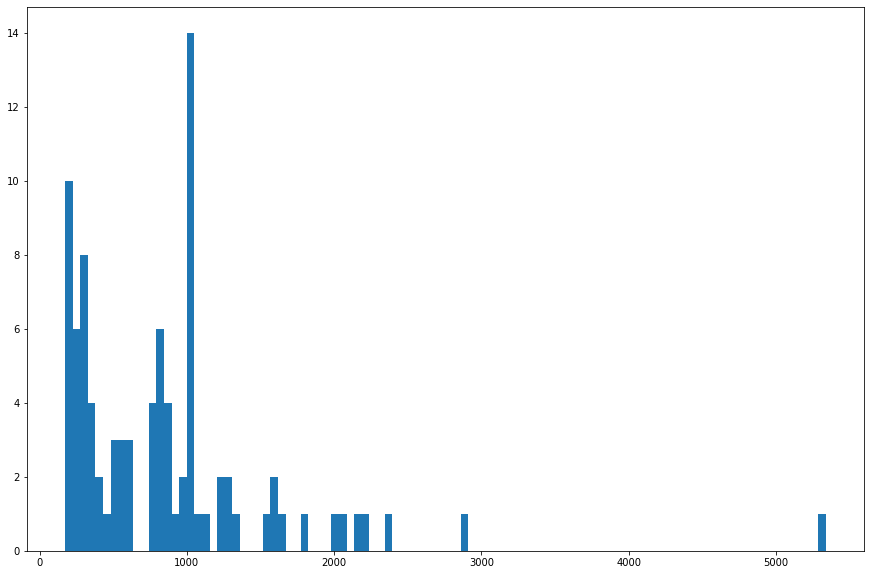

In [11]:
My_df = My_df[My_df['download_count'] <= 6000]
plt.hist(My_df['download_count'], bins=100)
plt.show()

Ta cần lọc đi một số outlier để biểu đồ được rõ ràng hơn các outlier là những giá trị lớn hơn 6000
- Nhận xét: 
    - Histogram thuộc dạng phân bố lệch trái
    - Số lượng download các tracks dao động trong khoảng 0 đến 1000 chiếm đa số

### Câu 2:  top 100 users có followers cao nhất và vẽ biểu đồ histogram để thể hiện các users có số lượng followers ở khoảng bao nhiêu chiếm đa số
   - Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
        - Các số liệu đã được xác định
        - Ứng dụng câu hỏi là tìm ra users nổi tiếng và có nhiều sản phẩm âm nhạc được ưa thích
        - Câu hỏi có thể trả lời với dữ liệu có sẵn

In [12]:
My_users = users_new

Ta cần tiền xử lý một số dữ liệu bất hợp lý
- Loại bỏ các dòng trùng nhau và giữ lại dòng xuất hiện đầu tiên

In [13]:
My_users = My_users[['followers_count', 'username']]
My_users = My_users.drop_duplicates(subset=['followers_count', 'username'], keep='first')

Tiếp theo ta sẽ sắp xếp lại theo thứ tự giảm dần rồi chọn 100 dòng đầu tiên

In [14]:
My_users = My_users.sort_values(by='followers_count', ascending=False)
My_users = My_users.head(100)
My_users

,followers_count,username
113,6498535.0,Skrillex
110,3649072.0,Seven Lions
205,3467276.0,Damian Marley
189,2785568.0,dubmatix
190,2768063.0,VP RECORDS
...,...,...
215,2349.0,Black Roots
120,2114.0,Tracey Chattaway
48,2011.0,Copeland Network
132,1814.0,Francesco Berta


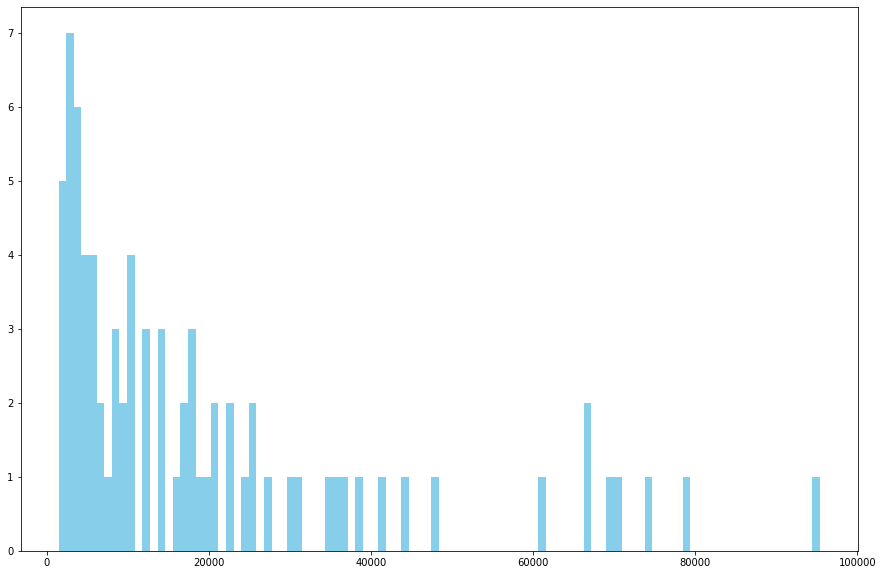

In [15]:
My_users = My_users[My_users['followers_count'] <= 100000]
plt.hist(My_users['followers_count'], bins=100, color = "skyblue")
plt.show()

Ta cần lọc đi một số outlier để biểu đồ được rõ ràng hơn các outlier là những giá trị lớn hơn 100000
- Nhận xét: 
    - Histogram thuộc dạng phân bố lệch trái
    - Số lượng followers các users dao động trong khoảng 0 đến 20000 chiếm đa số

### Câu 3


In [16]:
box_df = tracks_new['likes_count']
box_df = tracks_new[tracks_new['likes_count'].notnull()]
l = box_df['likes_count'].to_list()
# print(l)

{'whiskers': [<matplotlib.lines.Line2D at 0x15d7d73afd0>,
 'caps': [<matplotlib.lines.Line2D at 0x15d7d74e730>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d7d73ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x15d7d74ee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d7d759220>],
 'means': []}

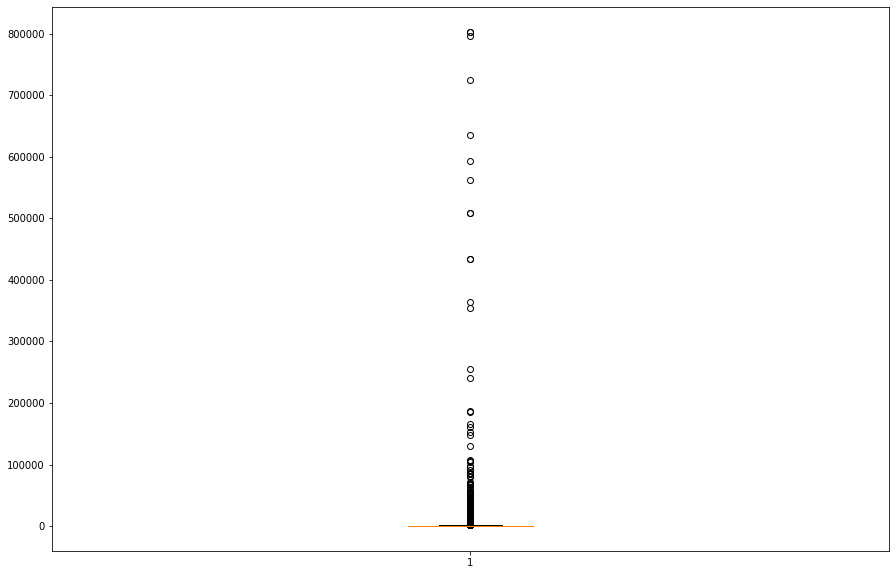

In [17]:
plt.boxplot(x=l)

### Câu hỏi 4: Sự tương quan giữa số lượt like và số lượt repost
Xét dataset **tracks** "**(3485, 38)**" chứa thông tin của từng track với số lượng sample là 3485. Ta sẽ xem xét 2 thuộc tính là:
- **likes_count**: số lượng người thích của track đó
- **reposts_count**: số lượng người đăng lại track đó
<!-- -->
Ta sẽ xem sự tương quan giữa số lượt thích **likes_count** với số lượng đăng lại **reposts_count** bằng Scatter plot để xem nếu một track có số lượt thích cao thì khả năng sẽ được repost lại cũng sẽ cao

In [18]:
cor_data = tracks_new[['likes_count', 'reposts_count']]

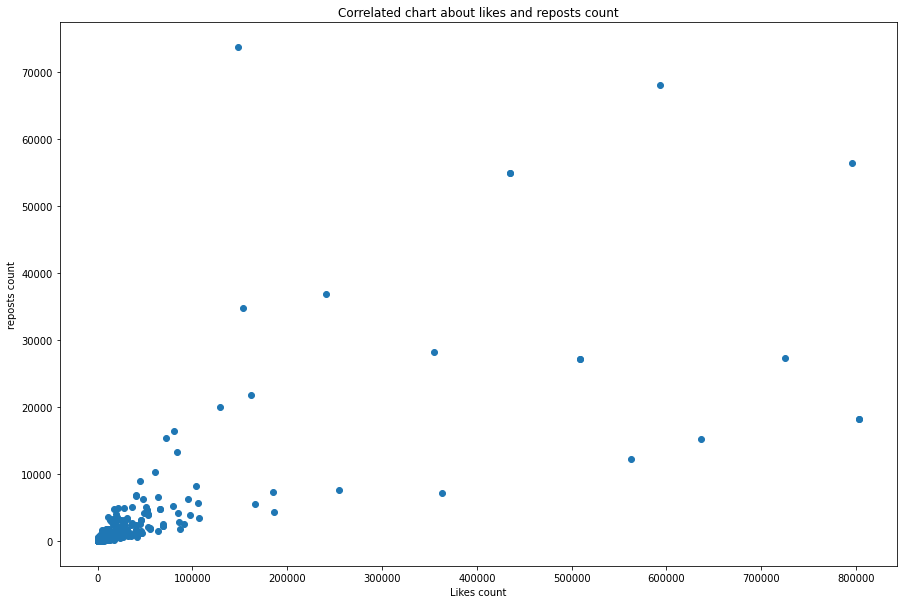

In [19]:
plt.scatter(cor_data['likes_count'], cor_data['reposts_count'], marker='o');
# plt.rcParams["figure.figsize"] = (15, 10)

plt.xlabel('Likes count')
plt.ylabel('reposts count')
plt.title("Correlated chart about likes and reposts count")
plt.show()

### Nhận xét:
- Với phương pháp này, ta có thể nhận thấy các điểm outlier và ta có thể loại trừ chúng
- ta sẽ xem xét kĩ trong khoảng từ 0-1000, bởi vì đây là nơi các điểm tập trung lớn nhất. Ta thấy các điểm có xu hướng theo một đường thẳng xéo đi lên,
vì vậy 2 biến **like_count** và **repost_count** có sự tương quan với nhau theo hướng dương (positive correlation), nghĩa là nếu lượt like_count tăng,
thì track đó sẽ được yêu thích nhiều hơn dẫn đến lượt repost sẽ cao hơn

# Câu 5: Đánh giá mối tương quan giữa followers và likes_count

- Trước khi trả lời câu hỏi này ta sẽ xác định một số ý như sau
     - Các số liệu đã được xác định.
     - Ứng dụng câu hỏi là xem sét mức độ ảnh hưởng của **sô lượng theo dõi** so với **tổng số lượt thích**.
     - Câu hỏi có thể trả lời với dữ liệu có sẵn.
     - Dự đoán tổng số lượt thích sẽ tỉ lệ thuận với tổng số người theo dõi của *user* đó

In [20]:
data_fl_likes = users_new[['likes_count', 'followers_count']]
# loại bỏ các ngoại lệ
data_fl_likes = data_fl_likes[data_fl_likes['followers_count'] < 50000]

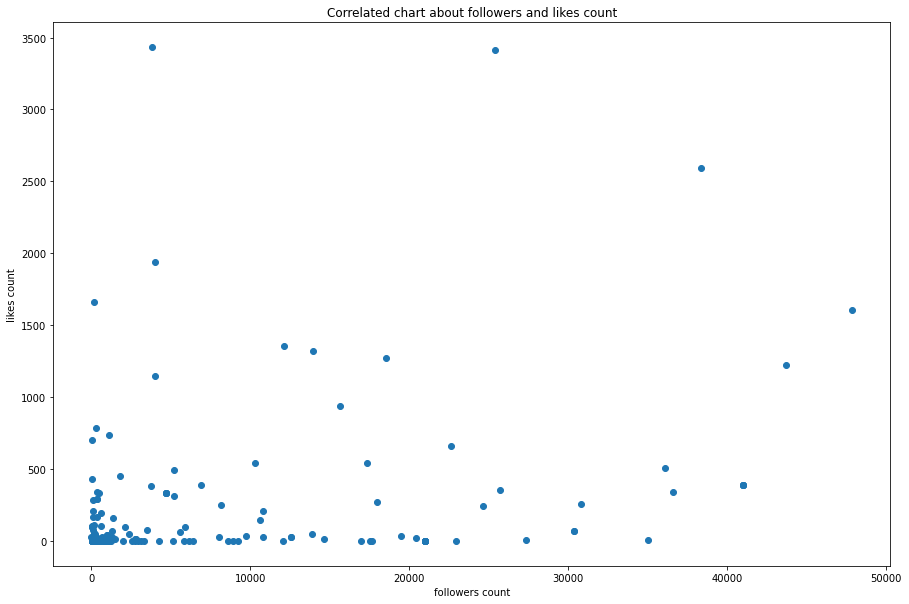

In [21]:
plt.scatter(data_fl_likes['followers_count'], data_fl_likes['likes_count'], marker='o');

plt.xlabel('followers count')
plt.ylabel('likes count')
plt.title("Correlated chart about followers and likes count")
plt.show()

# Nhận xét qua biểu đồ:
- Lượng theo dõi không ảnh hưởng quá nhiều đến tổng số lượt thích của *user* đó.
- Đa phần lượt thích chỉ trong khoảng 0 - 500, và nó đúng với phần lớn dữ liệu.
- Số lượng lượt thích gần bằng 0 rất nhiều cho dù số lượng theo dõi của user đó khá lớn (khoảng 10000 - 35000), điều đó có thể giải thích được người dùng chỉ like khi bài hát đó thực sự gây ấn tượng với họ.
- Đối với những user có lượng theo dõi ít ( ít hơn 10000), tuy nhiên số lượt thích lại rất cao. Đây là những user mới nhưng đã gây được ấn tượng mạnh đối với người dùng với những bản nhạc đi vào lòng người. Đây là những user cực kì tiềm năng và sẽ thành công trong tương lại nếu tiếp tục cho ra những bản nhạc chất lượng.
- Đôi với những user có lượng theo dõi lớn nhưng chưa có được số lượt thích cao, điều này có thể giải thích là những người này đã thành lập tài khoản đã lâu và ra nhiều bài chưa gây ấn tượng mạnh nhưng người dùng vẫn mong chờ họ có thể cho ra các ca khúc tốt hơn nên đã theo dõi, hoặc có thể họ dùng chiều trò mua lượng theo dõi để tăng độ uy tín cho người dùng.

# Câu 6: Top 10 thể loại nhạc phổ biến năm 2021

In [23]:
df = pd.read_csv('data\\tracks_new.csv')
# láy 2 thuộc tính là 'genre và created_at' và bỏ qua dòng có giá trị null.
dt_df = df[['genre', 'created_at']].dropna()

# đổi kiểu dữ liêu thuộc tính 'created_at' thành kiểu datetime
dt_df['created_at'] = pd.to_datetime(dt_df['created_at'])

# láy top 10 thể loại phổ biến nhất năm 2021.
dt_df['year'] = dt_df['created_at'].apply(lambda x: x.year)
top_10_popular = dt_df.query('year == 2021')['genre'].value_counts()[:10]

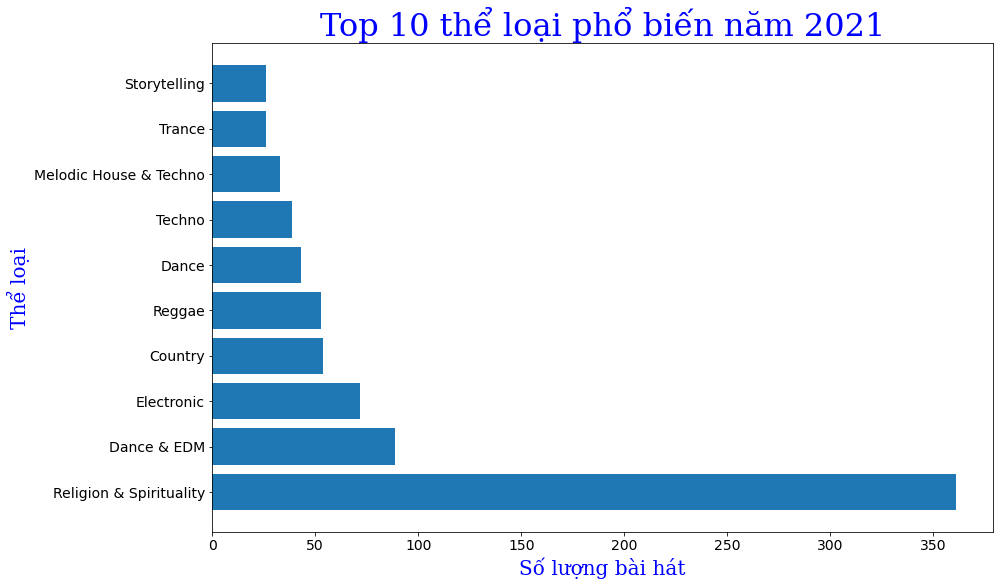

In [25]:
# visualization
fig, ax = plt.subplots(figsize=(14, 9))

ax.barh(top_10_popular[:10].index, top_10_popular[:10])


font = {'family': 'serif',
        'color':  'blue',
        }
ax.set_title('Top 10 thể loại phổ biến năm 2021',fontdict=font, fontsize=32)
ax.set_xlabel('Số lượng bài hát', fontdict=font, fontsize=20)
ax.set_ylabel('Thể loại', fontdict=font, fontsize=20)
ax.tick_params(labelsize=14)
# fig.autofmt_xdate()

plt.show()

- số liệu trước khi bắt đầu cột thuộc tính "genre": tên thể loại và "created_at": ngày tạo.
- ngữ cảnh biết được xu hướng âm nhạc trong năm 2021, cho thể cho ra những sản phẩm nằm trong top 10 thể loại phổ biến, có thể giúp cho bài hát được nhiều người biết tới.
- mức độ đánh giá cho câu trả lời không cao (dữ liệu có thêm thuộc tính lược view thì kết quả sẽ tốt hơn).

- nhìn vào biểu đồ ta có thể tháy thể loại "Religion & Spirituality" là thể loại có nhiều bài hát nhất năm 2021 ta có thể đánh giá nó là thể loại đang được hướng tới từ những người nghệ sĩ.